In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: locale.format('%.4f', x, grouping=True))

In [7]:
def tabela_resultados(url_file_mip,form_):
    
    df = pd.read_csv(url_file_mip,header=None, sep=';')

    table = pd.DataFrame()
    table = pd.concat([table, df], ignore_index=True)
    table.columns = ['instance','ub','tempo mip','rf','trf','fop','tfop','lb','gap','node','tempo total heuristic','opt']
    table = table[['instance','lb','ub','tempo mip','rf','trf','fop','tfop','gap','node','tempo total heuristic','opt']]

    table['grupo'] = 'grupo' 
    if form_ == 'SP':
        table.drop(38,axis=0,inplace=True) 
    
    table.reset_index(drop=True,inplace=True)

    
    table_result = pd.DataFrame()

    contador  = 1
    set_cont = 1
    while True:
        set_ ='set0{}'.format(str(set_cont))
        tab = pd.DataFrame()
        for i in range(contador, contador+12):
            t = table.loc[table['instance'] == f'c52_{i}.txt']
            tab = pd.concat([tab,t])
            table.loc[table[table['instance'] == f'c52_{i}.txt'].index,'grupo'] = set_
            
        
        tab = pd.DataFrame({
            'instance':f'{set_}',
            'lb':tab['lb'].mean(),
            'ub':tab['ub'].mean(),
            'tempo mip':tab['tempo mip'].mean(),
            'rf':tab['rf'].mean(),
            'trf':tab['trf'].mean(),
            'fop':tab['fop'].mean(),
            'tfop':tab['tfop'].mean(),
            'trf':tab['trf'].mean(),
            'trf':tab['trf'].mean(),
            #'gap':tab.loc[table['opt'] == 0,'gap'].mean(),
            #'time':tab.loc[table['opt'] == 1,'time'].mean(),
            'gap':tab['gap'].mean(),
            'tempo total heuristic':tab['tempo total heuristic'].mean(),
            # 'node':tab['node'].mean(),
            'opt':tab['opt'].sum(),
            },index=[f'{form_}']
        )


        if table_result.shape[0] == 0:
            table_result = tab.copy(deep=True)
        else:
            table_result = pd.concat([table_result,tab])

        contador = contador + 12
        set_cont = set_cont + 1

        if set_cont > 9 :
            break

    return table_result.reset_index(drop=True), table

In [17]:
form_ = "MC"
mip_="mip"



file=f"C:/Users/mateu/Downloads/Mestrado-main/Mestrado-main/CLSP_PY/MODELO_MC/MODELO_MC_RF_OPT/RESULTADOS/clsr_{form_}_relax_and_opt_table_{mip_}.txt"
df = pd.read_csv(file, sep=';',header=None)
df.columns = ['instance','ub','tempo mip','rf','trf','fop','tfop','lb','gap','node','tempo total heuristic','opt']
table_result_mc, table_mc = tabela_resultados(file,form_)

In [29]:
table_mc['instance'].value_counts()

instance
c52_1.txt      1
c52_69.txt     1
c52_80.txt     1
c52_79.txt     1
c52_78.txt     1
              ..
c52_33.txt     1
c52_32.txt     1
c52_31.txt     1
c52_30.txt     1
c52_108.txt    1
Name: count, Length: 108, dtype: int64

In [18]:
table_result_mc

,instance,lb,ub,tempo mip,rf,trf,fop,tfop,gap,tempo total heuristic,opt
0,set01,10570.656833,10643.516667,2816.538833,10718.816667,9.445583,10678.450000,5.063667,0.006667,14.509500,4
1,set02,16962.392167,17240.325000,3600.002250,17377.058333,11.308750,17353.100000,5.795500,0.016167,17.104167,0
2,set03,47310.587000,48238.025000,3600.002667,48375.308333,13.219833,48312.366667,6.221750,0.019333,19.441667,0
3,set04,14859.832500,14875.525000,1470.266750,15032.000000,9.268750,14963.783333,5.011750,0.001000,14.280583,11
4,set05,21479.086750,21839.058333,3600.002583,22049.716667,12.335917,21968.925000,5.621250,0.016583,17.957250,0
5,set06,52202.302667,52851.816667,3600.002833,53233.225000,15.689750,53137.708333,6.195833,0.012583,21.885417,0
6,set07,27721.940500,27721.941667,70.676417,33013.075000,7.975667,28002.125000,4.250500,0.000000,12.226333,12
7,set08,36906.249583,36906.266667,955.359250,42352.816667,10.068667,37289.458333,4.956250,0.000000,15.025000,12
8,set09,71972.984583,72885.916667,3600.002833,73353.191667,18.974333,73182.041667,5.839833,0.012333,24.814167,0


In [19]:
tab = pd.DataFrame({
    'instance':f'res_rf_opt_mc',
    'lb':table_result_mc['lb'].mean(),
    'ub':table_result_mc['ub'].mean(),
    'tempo mip':table_result_mc['tempo mip'].mean(),
    'rf':table_result_mc['rf'].mean(),
    'trf':table_result_mc['trf'].mean(),
    'fop' : table_result_mc['fop'].mean(),
    'tfop' : table_result_mc['tfop'].mean(),
    'gap' : table_result_mc['gap'].mean(),
    'tempo total heuristic' : table_result_mc['tempo total heuristic'].mean(),   
    'opt' : table_result_mc['opt'].sum() 
    },index=[f'res_rf_opt_mc']
)

res_rf_opt_mc = pd.concat([table_result_mc, tab], ignore_index=True)
res_rf_opt_mc

print(res_rf_opt_mc[['instance','lb','ub','tempo mip','rf','trf','fop','tfop','gap','tempo total heuristic','opt']].to_latex(index=False,float_format="%.2f"))

\begin{tabular}{lrrrrrrrrrr}
\toprule
instance & lb & ub & tempo mip & rf & trf & fop & tfop & gap & tempo total heuristic & opt \\
\midrule
set01 & 10570.66 & 10643.52 & 2816.54 & 10718.82 & 9.45 & 10678.45 & 5.06 & 0.01 & 14.51 & 4 \\
set02 & 16962.39 & 17240.33 & 3600.00 & 17377.06 & 11.31 & 17353.10 & 5.80 & 0.02 & 17.10 & 0 \\
set03 & 47310.59 & 48238.03 & 3600.00 & 48375.31 & 13.22 & 48312.37 & 6.22 & 0.02 & 19.44 & 0 \\
set04 & 14859.83 & 14875.52 & 1470.27 & 15032.00 & 9.27 & 14963.78 & 5.01 & 0.00 & 14.28 & 11 \\
set05 & 21479.09 & 21839.06 & 3600.00 & 22049.72 & 12.34 & 21968.93 & 5.62 & 0.02 & 17.96 & 0 \\
set06 & 52202.30 & 52851.82 & 3600.00 & 53233.23 & 15.69 & 53137.71 & 6.20 & 0.01 & 21.89 & 0 \\
set07 & 27721.94 & 27721.94 & 70.68 & 33013.08 & 7.98 & 28002.13 & 4.25 & 0.00 & 12.23 & 12 \\
set08 & 36906.25 & 36906.27 & 955.36 & 42352.82 & 10.07 & 37289.46 & 4.96 & 0.00 & 15.02 & 12 \\
set09 & 71972.98 & 72885.92 & 3600.00 & 73353.19 & 18.97 & 73182.04 & 5.84 & 0.01 & 24

Text(0.5, 0, 'Grupo')

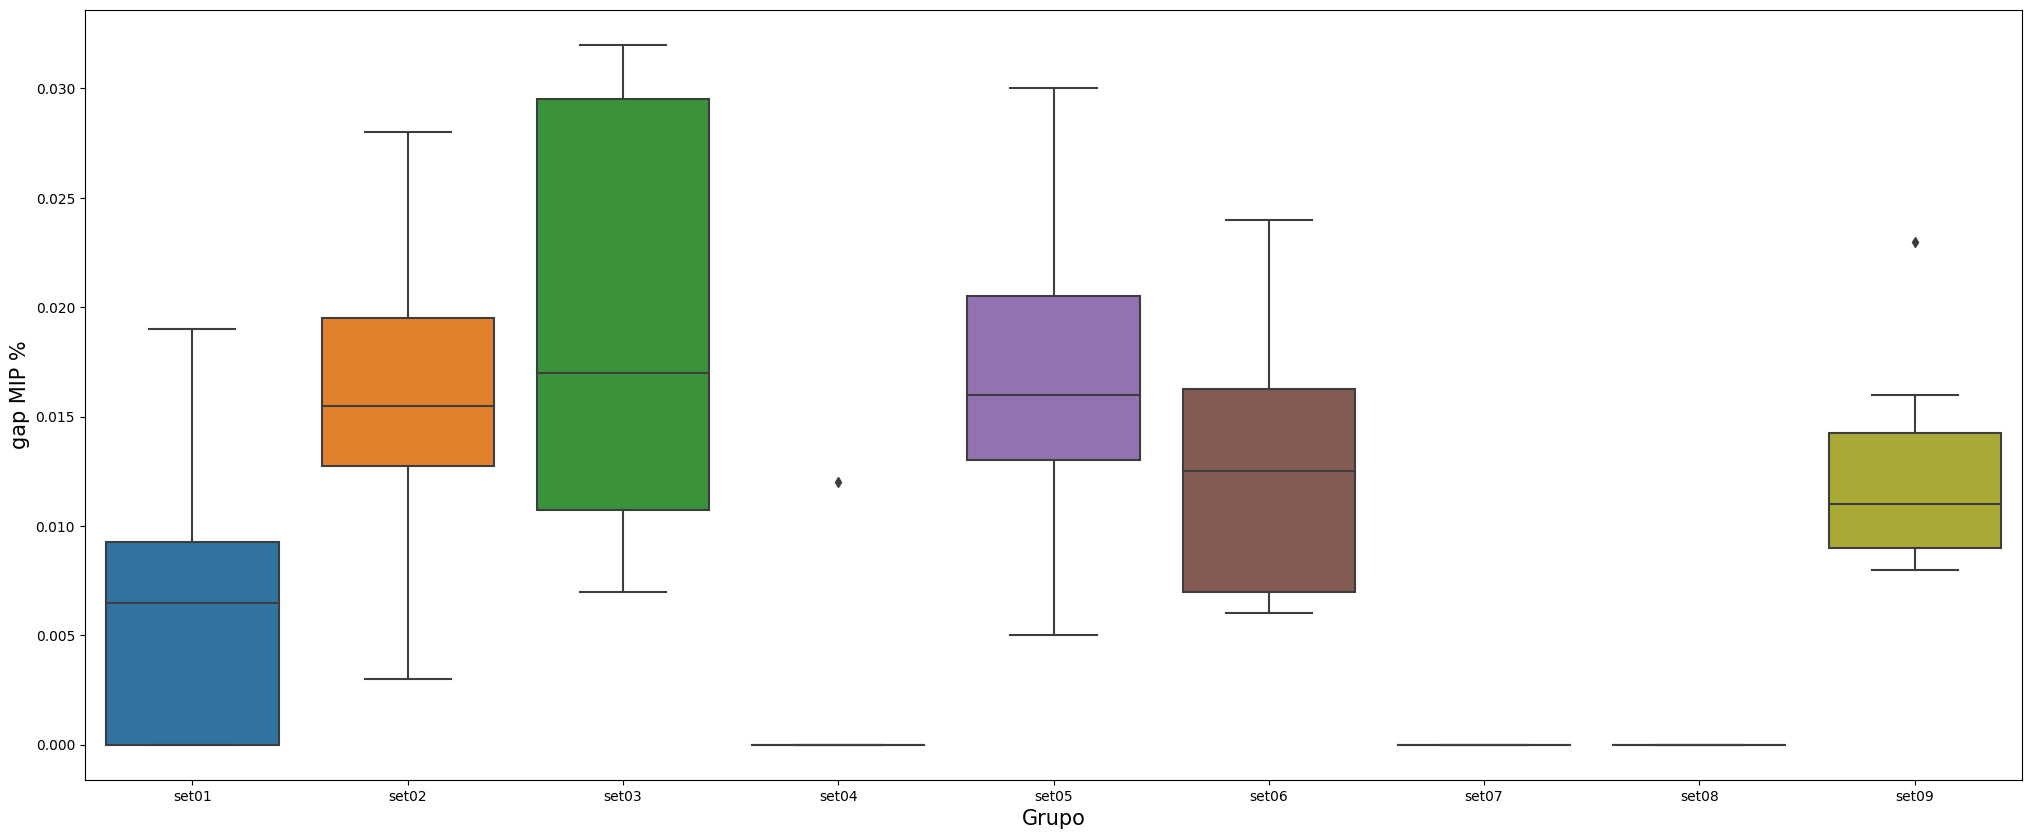

In [24]:
plt.figure(figsize=(25,10))
sns.boxplot(x=table_mc['grupo'].astype('str'), y= table_mc['gap'], order= sorted(list(table_mc['grupo'].unique().astype('str'))))
plt.ylabel("gap MIP %", fontsize = 15)

plt.xlabel("Grupo", fontsize = 15)

Text(0.5, 0, 'Grupo')

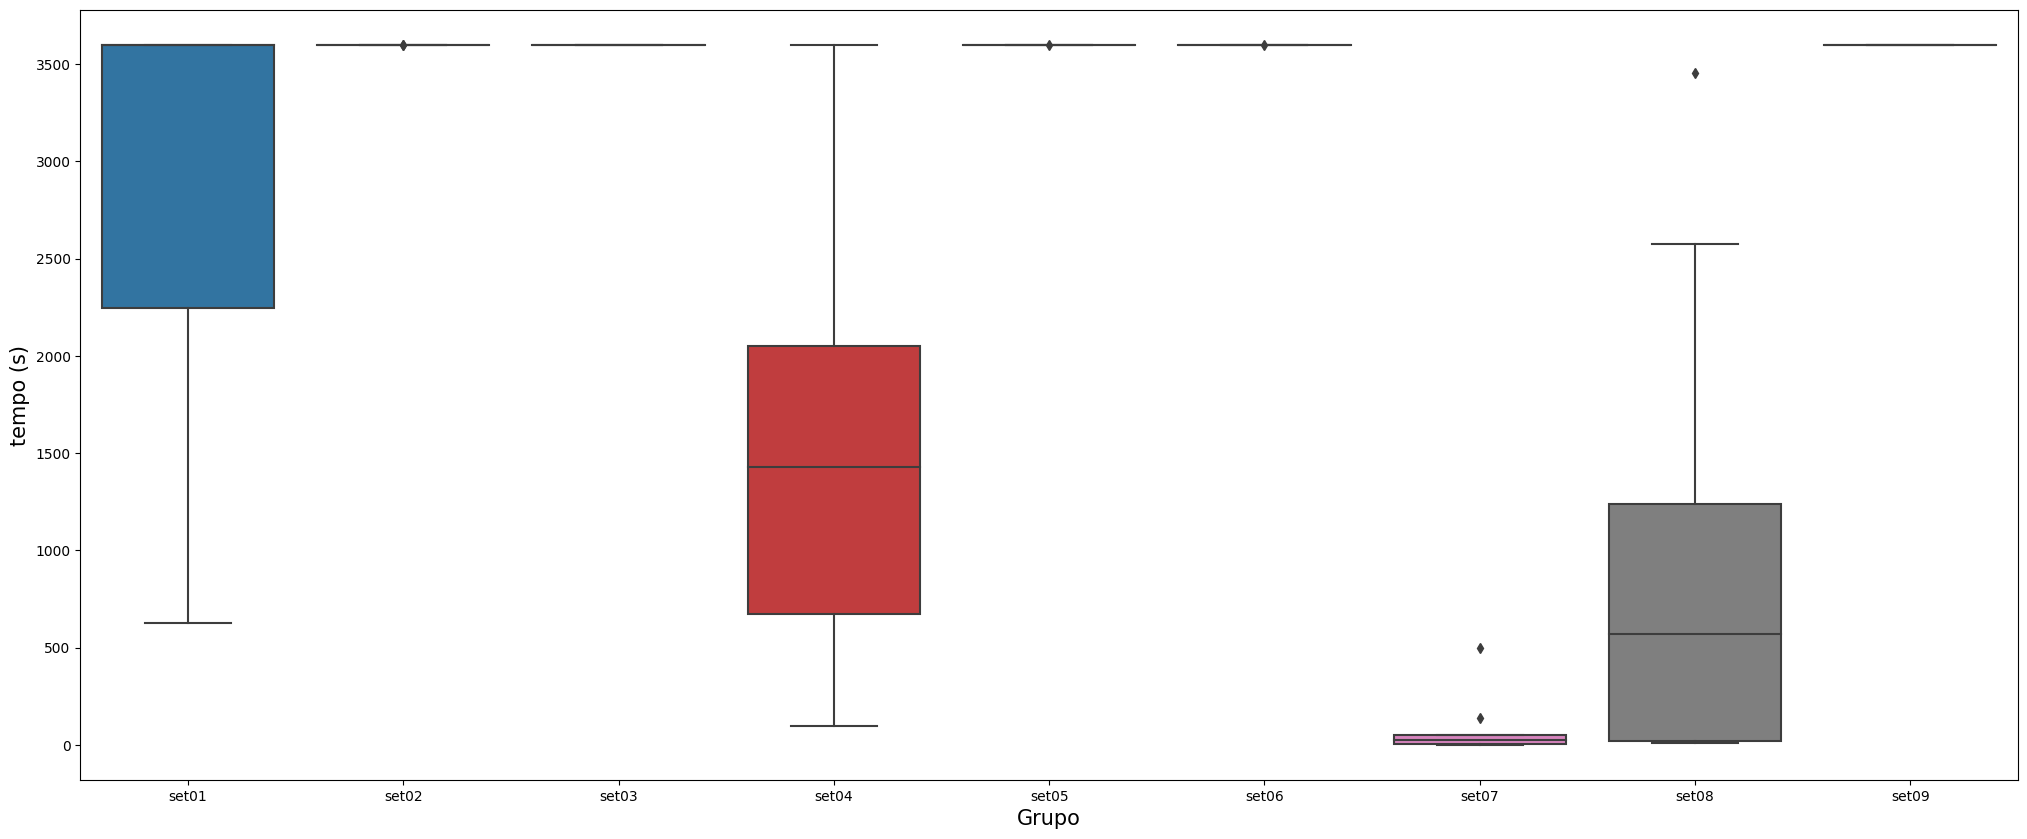

In [42]:
plt.figure(figsize=(25,10))
sns.boxplot(x=table_mc['grupo'].astype('str'), y= table_mc['tempo mip'], order= sorted(list(table_mc['grupo'].unique().astype('str'))))
plt.ylabel("tempo (s)", fontsize = 15)

plt.xlabel("Grupo", fontsize = 15)

In [36]:
form_ = "SP"
mip_="mip"



file=f"C:/Users/mateu/Downloads/Mestrado-main/Mestrado-main/CLSP_PY/MODELO_SP/MODELO_SP_RF_OPT/RESULTADOS/clsr_{form_}_relax_and_opt_{mip_}_table.txt"
df = pd.read_csv(file, sep=';',header=None)

df.columns = ['instance','ub','tempo mip','rf','trf','fop','tfop','lb','gap','node','tempo total heuristic','opt']
table_result_sp, table_sp = tabela_resultados(file,form_)

In [37]:
table_sp

,instance,lb,ub,tempo mip,rf,trf,fop,tfop,gap,node,tempo total heuristic,opt,grupo
0,c52_1.txt,9339.681,9763.995,3600.001,9796.8,5.519,9776.4,3.665,0.043,597939.0,3609.598,0,set01
1,c52_2.txt,9529.091,10144.600,3600.002,10204.6,7.053,10159.2,4.290,0.061,922714.0,3612.018,0,set01
2,c52_3.txt,9165.061,9338.600,3600.002,9413.8,5.022,9381.8,3.452,0.019,618621.0,3608.801,0,set01
3,c52_4.txt,9798.781,10381.396,3600.001,10400.2,6.861,10381.4,4.696,0.056,893743.0,3612.199,0,set01
4,c52_5.txt,10693.663,11171.977,3600.004,11243.5,5.771,11172.0,4.199,0.043,948079.0,3610.593,0,set01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,c52_104.txt,71566.366,72897.486,3600.001,72897.5,24.596,72897.5,5.117,0.018,1083580.0,3630.379,0,set09
104,c52_105.txt,69855.041,70650.600,3600.002,71415.8,17.856,71363.0,4.962,0.011,766757.0,3623.177,0,set09
105,c52_106.txt,81612.187,83663.795,3600.001,84083.0,30.213,83903.2,6.763,0.025,1158540.0,3637.667,0,set09
106,c52_107.txt,62887.402,64067.741,3600.001,64242.8,15.245,64197.0,4.251,0.018,620816.0,3619.835,0,set09


In [39]:
table_result_sp

,instance,lb,ub,tempo mip,rf,trf,fop,tfop,gap,tempo total heuristic,opt
0,set01,10268.664917,10661.142000,3600.009167,10718.816667,5.348750,10678.450000,3.829750,0.036750,3609.794000,0
1,set02,16694.916667,17259.382750,3600.005583,17377.058333,7.626333,17353.099917,4.617083,0.032917,3612.782917,0
2,set03,46725.035583,48262.311750,3600.005250,48375.308333,11.661000,48312.366667,5.846917,0.032250,3618.098083,0
3,set04,14468.858833,14881.614750,3528.673750,15032.000000,6.397583,14963.783333,3.819333,0.027667,3539.456333,1
4,set05,21109.056583,21873.605500,3600.013250,22049.716667,9.733750,21968.925000,4.621583,0.034917,3614.947000,0
5,set06,51519.170167,52913.607667,3600.006917,53233.225000,13.452833,53137.708333,5.543583,0.027000,3619.500917,0
6,set07,27668.662333,27721.934167,1099.764917,33013.075000,6.396333,28003.458333,3.845750,0.001250,1110.173583,10
7,set08,36656.491250,36906.257583,2489.232167,42352.816667,8.879833,37289.458333,4.352833,0.006000,2502.798833,5
8,set09,71708.233417,72948.791583,3600.008417,73353.191667,23.071667,73182.041667,5.474333,0.016833,3629.113667,0


In [40]:
tab = pd.DataFrame({
    'instance':f'res_rf_opt_sp',
    'lb':table_result_sp['lb'].mean(),
    'ub':table_result_sp['ub'].mean(),
    'tempo mip':table_result_sp['tempo mip'].mean(),
    'rf':table_result_sp['rf'].mean(),
    'trf':table_result_sp['trf'].mean(),
    'fop' : table_result_sp['fop'].mean(),
    'tfop' : table_result_sp['tfop'].mean(),
    'gap' : table_result_sp['gap'].mean(),
    'tempo total heuristic' : table_result_sp['tempo total heuristic'].mean(),   
    'opt' : table_result_sp['opt'].sum() 
    },index=[f'res_rf_opt_sp']
)

res_rf_opt_sp = pd.concat([table_result_sp, tab], ignore_index=True)
res_rf_opt_sp

print(res_rf_opt_sp[['instance','lb','ub','tempo mip','rf','trf','fop','tfop','gap','tempo total heuristic','opt']].to_latex(index=False,float_format="%.2f"))

\begin{tabular}{lrrrrrrrrrr}
\toprule
instance & lb & ub & tempo mip & rf & trf & fop & tfop & gap & tempo total heuristic & opt \\
\midrule
set01 & 10268.66 & 10661.14 & 3600.01 & 10718.82 & 5.35 & 10678.45 & 3.83 & 0.04 & 3609.79 & 0 \\
set02 & 16694.92 & 17259.38 & 3600.01 & 17377.06 & 7.63 & 17353.10 & 4.62 & 0.03 & 3612.78 & 0 \\
set03 & 46725.04 & 48262.31 & 3600.01 & 48375.31 & 11.66 & 48312.37 & 5.85 & 0.03 & 3618.10 & 0 \\
set04 & 14468.86 & 14881.61 & 3528.67 & 15032.00 & 6.40 & 14963.78 & 3.82 & 0.03 & 3539.46 & 1 \\
set05 & 21109.06 & 21873.61 & 3600.01 & 22049.72 & 9.73 & 21968.93 & 4.62 & 0.03 & 3614.95 & 0 \\
set06 & 51519.17 & 52913.61 & 3600.01 & 53233.23 & 13.45 & 53137.71 & 5.54 & 0.03 & 3619.50 & 0 \\
set07 & 27668.66 & 27721.93 & 1099.76 & 33013.08 & 6.40 & 28003.46 & 3.85 & 0.00 & 1110.17 & 10 \\
set08 & 36656.49 & 36906.26 & 2489.23 & 42352.82 & 8.88 & 37289.46 & 4.35 & 0.01 & 2502.80 & 5 \\
set09 & 71708.23 & 72948.79 & 3600.01 & 73353.19 & 23.07 & 73182.04 & 5.

Text(0.5, 0, 'Grupo')

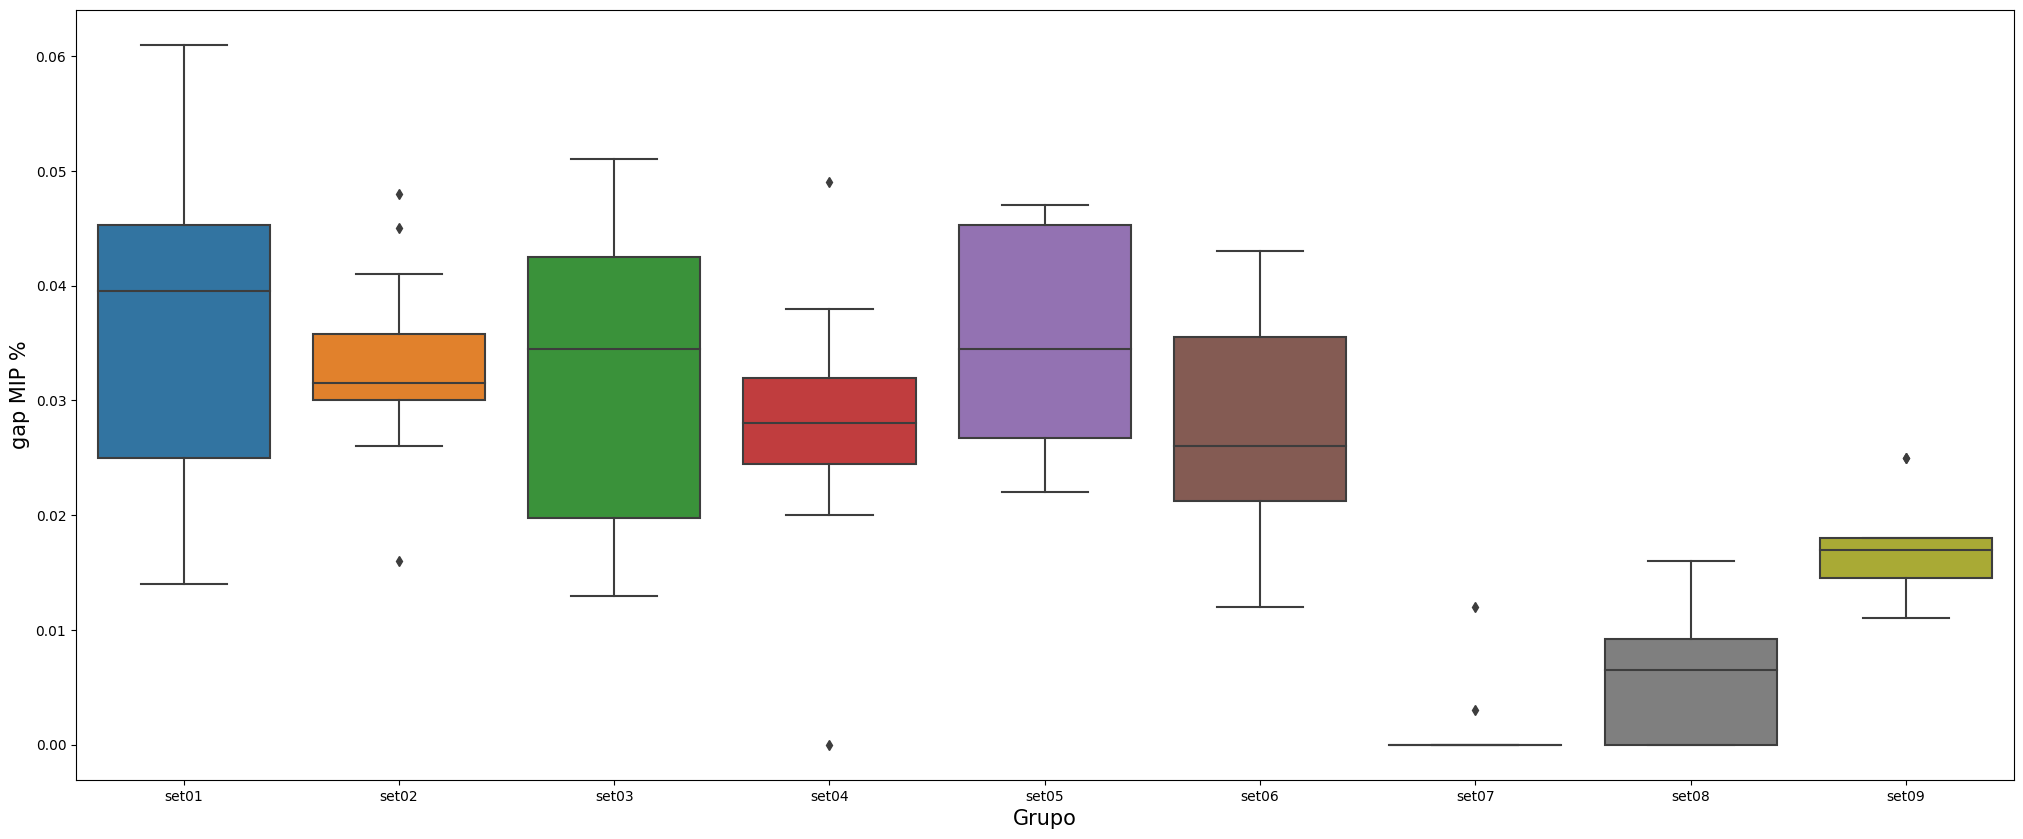

In [41]:
plt.figure(figsize=(25,10))
sns.boxplot(x=table_sp['grupo'].astype('str'), y= table_sp['gap'], order= sorted(list(table_sp['grupo'].unique().astype('str'))))
plt.ylabel("gap MIP %", fontsize = 15)

plt.xlabel("Grupo", fontsize = 15)

Text(0.5, 0, 'Grupo')

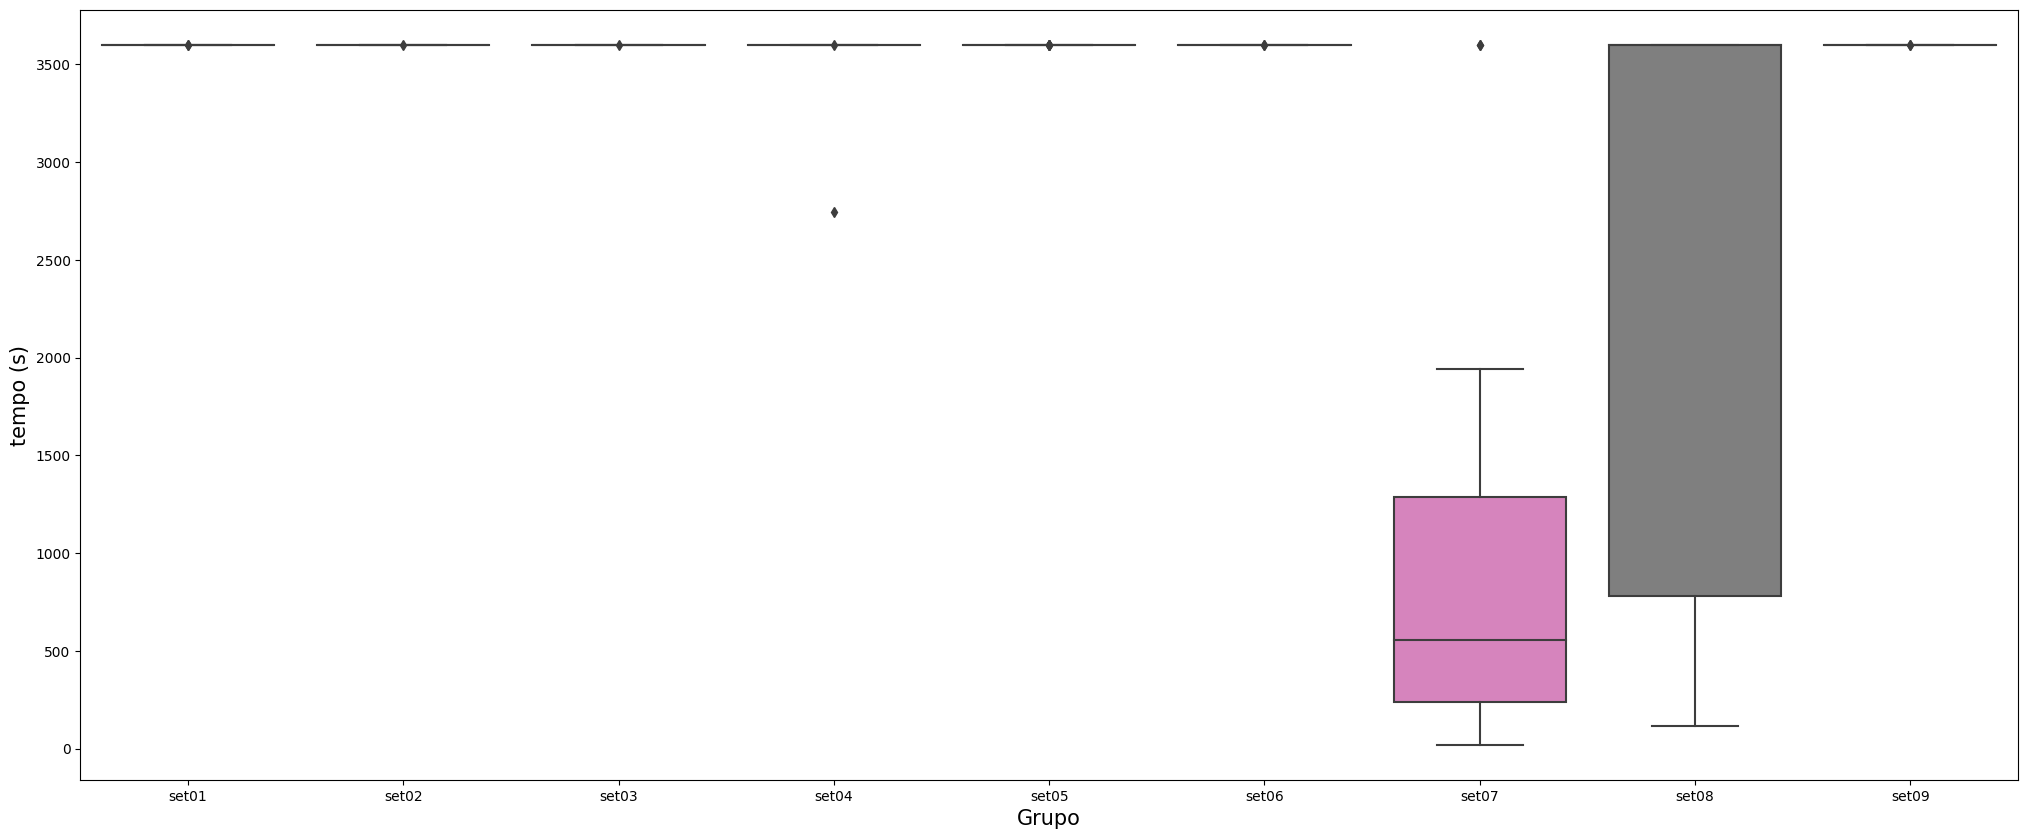

In [43]:
plt.figure(figsize=(25,10))
sns.boxplot(x=table_sp['grupo'].astype('str'), y= table_sp['tempo mip'], order= sorted(list(table_sp['grupo'].unique().astype('str'))))
plt.ylabel("tempo (s)", fontsize = 15)

plt.xlabel("Grupo", fontsize = 15)

In [8]:
form_ = "STD"
mip_="mip"


file=f"C:/Users/mateu/Downloads/Mestrado-main/Mestrado-main/CLSP_PY/MODELO_STD/MODELO_STD_RF_OPT/RESULTADOS/clsr_{form_}_relax_and_opt_table_{mip_}.txt"
df = pd.read_csv(file, sep=';',header=None)

df.columns = ['instance','ub','tempo mip','rf','trf','fop','tfop','lb','gap','node','tempo total heuristic','opt']
table_result_std, table_std = tabela_resultados(file,form_)

In [9]:
table_std

,instance,lb,ub,tempo mip,rf,trf,fop,tfop,gap,node,tempo total heuristic,opt,grupo
0,c52_1.txt,9746.200,9746.2,528.923,9883.2,1.172,9883.2,0.523,0.000,276385.0,530.630,1,set01
1,c52_2.txt,10077.239,10120.2,3600.001,10235.8,0.712,10181.0,0.595,0.004,1485291.0,3601.526,0,set01
2,c52_3.txt,9334.000,9334.0,98.236,9442.8,0.644,9404.6,0.455,0.000,85964.0,99.347,1,set01
3,c52_4.txt,10331.993,10332.0,1198.662,10451.2,0.661,10418.6,0.564,0.000,757070.0,1199.899,1,set01
4,c52_5.txt,11111.497,11111.5,91.431,11201.0,0.727,11164.5,0.529,0.000,81006.0,92.698,1,set01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,c52_104.txt,72897.434,72897.5,2941.263,81737.0,0.652,78664.0,0.485,0.000,2027279.0,2942.412,1,set09
104,c52_105.txt,70650.547,70650.6,188.641,76685.8,0.434,74869.0,0.400,0.000,117774.0,189.486,1,set09
105,c52_106.txt,82540.711,83134.4,3600.001,90922.6,0.428,86501.6,0.347,0.007,1728245.0,3601.497,0,set09
106,c52_107.txt,63700.800,63700.8,166.599,67157.2,0.387,64972.4,0.333,0.000,80190.0,167.330,1,set09


In [10]:
table_result_std

,instance,lb,ub,tempo mip,rf,trf,fop,tfop,gap,tempo total heuristic,opt
0,set01,10631.004167,10641.491667,1250.684167,10748.350000,0.739333,10712.275000,0.533083,0.001000,1252.025167,10
1,set02,17157.001583,17222.975000,2257.541917,17384.500000,0.718667,17327.008333,0.507083,0.004000,2258.948833,7
2,set03,48023.244667,48178.000000,3185.238250,48396.575000,0.668750,48316.116667,0.469417,0.003333,3186.698833,3
3,set04,14875.522167,14875.525000,361.660083,15608.541667,0.504750,15053.383333,0.415417,0.000000,362.592250,12
4,set05,21803.739250,21814.283333,1757.335833,22737.250000,0.568833,22322.841667,0.442500,0.000417,1758.375917,11
5,set06,52613.419500,52790.408333,2472.109083,53435.591667,0.574833,53111.900000,0.430250,0.003250,2473.310917,5
6,set07,27721.941667,27721.941667,2.873917,32253.366667,0.345417,27976.775000,0.337250,0.000000,3.566583,12
7,set08,36906.265917,36906.266667,24.573000,41857.800000,0.363083,37574.291667,0.313667,0.000000,25.260417,12
8,set09,72655.537333,72846.166667,2149.305333,79150.175000,0.466417,77167.266667,0.341500,0.002417,2150.369083,6


In [11]:
tab = pd.DataFrame({
    'instance':f'res_rf_opt_std',
    'lb':table_result_std['lb'].mean(),
    'ub':table_result_std['ub'].mean(),
    'tempo mip':table_result_std['tempo mip'].mean(),
    'rf':table_result_std['rf'].mean(),
    'trf':table_result_std['trf'].mean(),
    'fop' : table_result_std['fop'].mean(),
    'tfop' : table_result_std['tfop'].mean(),
    'gap' : table_result_std['gap'].mean(),
    'tempo total heuristic' : table_result_std['tempo total heuristic'].mean(),   
    'opt' : table_result_std['opt'].sum() 
    },index=[f'res_rf_opt_sp']
)

res_rf_opt_std = pd.concat([table_result_std, tab], ignore_index=True)
res_rf_opt_std

print(res_rf_opt_std[['instance','lb','ub','tempo mip','rf','trf','fop','tfop','gap','tempo total heuristic','opt']].to_latex(index=False,float_format="%.2f"))

\begin{tabular}{lrrrrrrrrrr}
\toprule
instance & lb & ub & tempo mip & rf & trf & fop & tfop & gap & tempo total heuristic & opt \\
\midrule
set01 & 10631.00 & 10641.49 & 1250.68 & 10748.35 & 0.74 & 10712.27 & 0.53 & 0.00 & 1252.03 & 10 \\
set02 & 17157.00 & 17222.97 & 2257.54 & 17384.50 & 0.72 & 17327.01 & 0.51 & 0.00 & 2258.95 & 7 \\
set03 & 48023.24 & 48178.00 & 3185.24 & 48396.58 & 0.67 & 48316.12 & 0.47 & 0.00 & 3186.70 & 3 \\
set04 & 14875.52 & 14875.52 & 361.66 & 15608.54 & 0.50 & 15053.38 & 0.42 & 0.00 & 362.59 & 12 \\
set05 & 21803.74 & 21814.28 & 1757.34 & 22737.25 & 0.57 & 22322.84 & 0.44 & 0.00 & 1758.38 & 11 \\
set06 & 52613.42 & 52790.41 & 2472.11 & 53435.59 & 0.57 & 53111.90 & 0.43 & 0.00 & 2473.31 & 5 \\
set07 & 27721.94 & 27721.94 & 2.87 & 32253.37 & 0.35 & 27976.77 & 0.34 & 0.00 & 3.57 & 12 \\
set08 & 36906.27 & 36906.27 & 24.57 & 41857.80 & 0.36 & 37574.29 & 0.31 & 0.00 & 25.26 & 12 \\
set09 & 72655.54 & 72846.17 & 2149.31 & 79150.18 & 0.47 & 77167.27 & 0.34 & 0.00 &